<a href="https://colab.research.google.com/github/alorrojayann/ComputerVision-CrashCourse/blob/main/Performing%20Face%20Recognition/(Alorro)Activity_7_Performing_Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 313
Code Title: | Advance Machine Learning and Deep Learning
2nd Semester | AY 2024-2025
<hr> | <hr>
<u>**ACTIVITY NO. 7** | **Performing Face Recognition**
**Name** | Alorro, Jay-ann
**Section** | CPE32S3
**Date Performed**: | 02/20/25
**Date Submitted**: | 02/21/25
**Instructor**: | Dr. Jonathan V. Taylar / Engr. Verlyn V. Nojor / Engr. Roman M. Richard

<hr>

## 1. Objectives

This activity aims to enable students to perform data preparation and face recognition on their own generated dataset.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Utilize data preparation techniques for images.
* Perform Face Recognition using multiple algorithms.
* Evaluate the performance of different algorithms.

## 3. Procedures and Outputs

### Preparing the training data

Now that we have our data, we need to load these sample pictures into our face recognition algorithms. All face recognition algorithms take two parameters in their `train()` method: an array of images and an array of labels. What do these labels represent? They are the IDs of a certain individual/face so that when face recognition is performed, we not only know the person was recognized but also who—among the many people available in our database—the person is.

To do that, we need to create a comma-separated value (CSV) file, which will contain the path to a sample picture followed by the ID of that person.

**Include a Screenshot of Your Dataset Here**

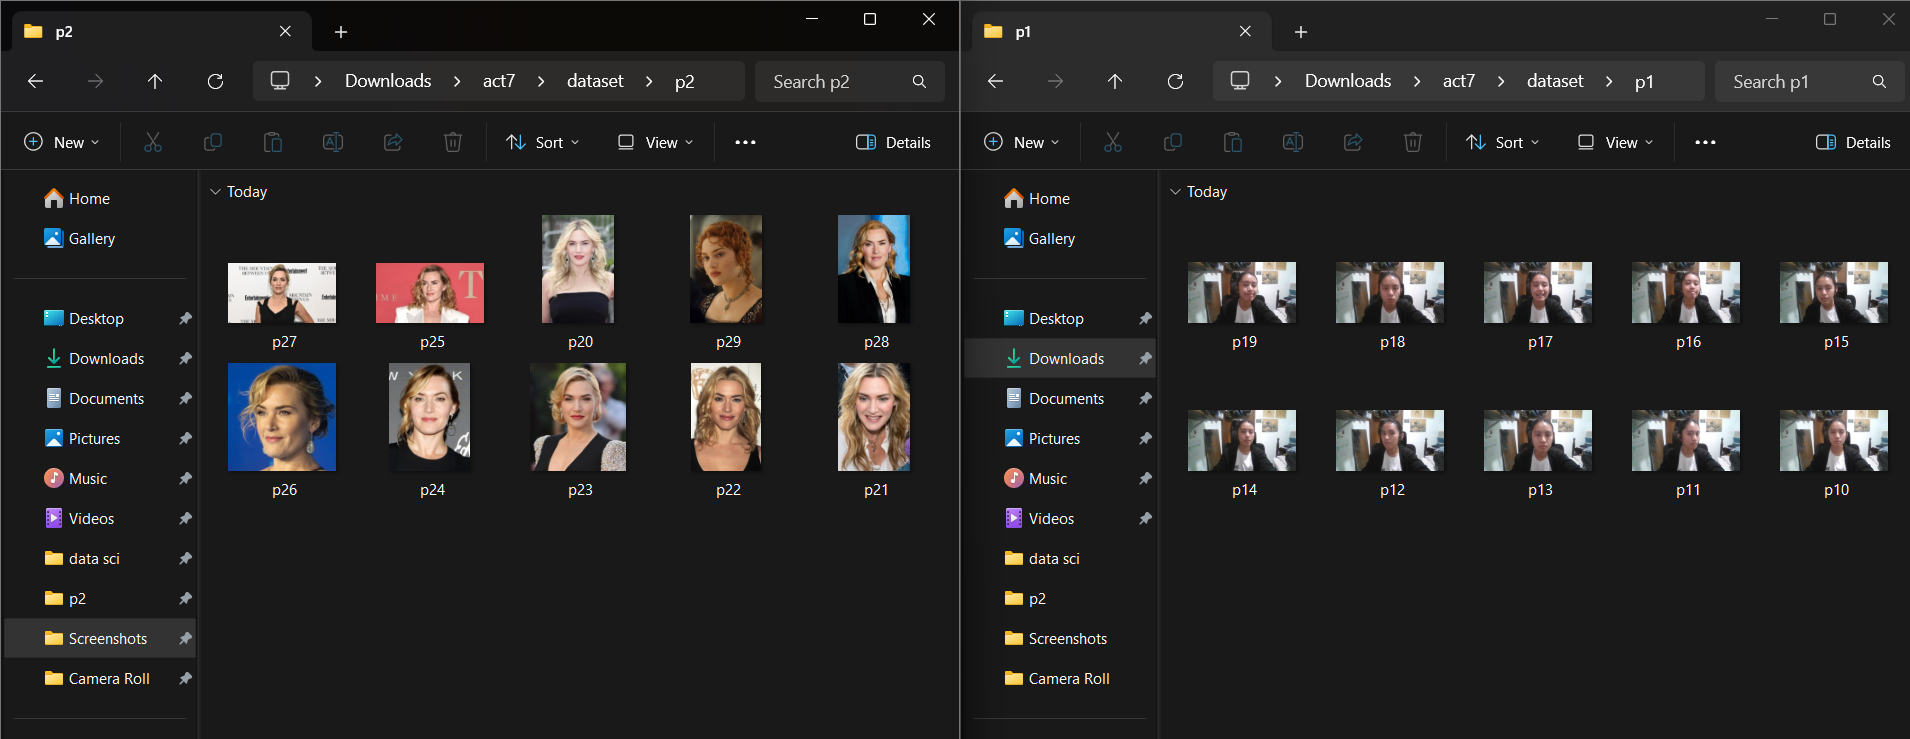

---

### Loading the data and recognizing faces

Next up, we need to load these two resources (the array of images and CSV file) into the face recognition algorithm, so it can be trained to recognize our face. To do this, we build a function that reads the CSV file and—for each line of the file—loads the image at the corresponding path into the images array and the ID into the labels array.

In [ ]:
import numpy as np
import os
import errno
import sys
import cv2

def read_images(path, sz=None):
    c = 0
    X, y = [], []

    for dirname, dirnames, filenames in os.walk(path):
        for subdirname in dirnames:
            subject_path = os.path.join(dirname, subdirname)
            for filename in os.listdir(subject_path):
                try:
                    if filename.startswith('.'):  # skip hidden/system files
                        continue

                    filepath = os.path.join(subject_path, filename)
                    im = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)

                    # If imread failed, skip
                    if im is None:
                        print(f"Skipping file {filepath} - not a valid image.")
                        continue

                    # Resize the images to the prescribed size
                    if sz is not None:
                        im = cv2.resize(im, (200,200))

                    X.append(np.asarray(im, dtype=np.uint8))
                    y.append(c)

                except IOError as e:
                    print(f"I/O Error({e.errno}): {e.strerror}")
                except Exception as e:
                    print("Unexpected error:", e)
                    raise
            c += 1
    return [X, y]

In [ ]:
dataset_path = r"C:\Users\Jay-ann Alorro\Downloads\act7\dataset"
img_dataset = read_images(dataset_path)
img_dataset

[[array([[ 56,  55,  55, ..., 226, 226, 226],
         [ 56,  55,  55, ..., 226, 226, 226],
         [ 56,  56,  56, ..., 226, 225, 225],
         ...,
         [190, 189, 187, ...,  39,  39,  38],
         [187, 187, 187, ...,  40,  39,  37],
         [181, 183, 184, ...,  39,  38,  37]], dtype=uint8),
  array([[ 52,  52,  52, ..., 223, 224, 224],
         [ 52,  52,  52, ..., 223, 224, 224],
         [ 52,  51,  51, ..., 223, 224, 224],
         ...,
         [179, 180, 181, ...,  39,  39,  39],
         [181, 181, 182, ...,  39,  39,  40],
         [181, 181, 181, ...,  38,  39,  40]], dtype=uint8),
  array([[ 53,  53,  54, ..., 220, 220, 221],
         [ 53,  53,  54, ..., 220, 220, 220],
         [ 53,  53,  54, ..., 220, 220, 220],
         ...,
         [176, 177, 177, ...,  35,  35,  35],
         [176, 177, 177, ...,  35,  35,  35],
         [176, 176, 177, ...,  34,  34,  34]], dtype=uint8),
  array([[ 54,  54,  54, ..., 221, 220, 219],
         [ 53,  53,  54, ..., 222, 221,

**Question: Run the function above on your generated dataset. Provide an analysis and note all the challenges you have encountered running this code.**

- Some challenges that I have encountered in this code is that the file format of the images need to be the same and I didn't realized it until I made some modification in the code which tells me if there is an invalid image or not.

---

### Performing Face Recognition Algorithms

Here is a sample script for testing the Face Recognition Algorithm. In this section, we're going to follow the same process but with different algorithms for face recognitions, namely:
- Eigenface Recognition
- Fisherface Recognition
- Local Binary Pattern Histograms (LBPH) Recognition

In [ ]:
pip install opencv-contrib-python --user

Note: you may need to restart the kernel to use updated packages.


In [ ]:
def face_rec():
  names = ['Kate Winslet', 'Jay-ann'] # Put your names here for faces to recognize
  if len(sys.argv) < 2:
    print("USAGE: facerec_demo.py </path/to/images> [</path/to/store/images/at>]")
    sys.exit()

  [X, y] = read_images(r"C:\Users\Jay-ann Alorro\Downloads\act7\dataset", (200,200))
  y = np.asarray(y, dtype=np.int32)

  model = cv2.face.EigenFaceRecognizer_create()
  model.train(X, y)

  camera = cv2.VideoCapture(0)
  face_cascade = cv2.CascadeClassifier(r"C:\Users\Jay-ann Alorro\Downloads\haarcascade_frontalface_default (1).xml")

  while True:
    ret, img = camera.read()
    if not ret:
      break

    faces = face_cascade.detectMultiScale(img, 1.3, 5)

    for (x, y, w, h) in faces:
      cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
      gray = cv2.cvtColor(img[y:y + h, x:x + w], cv2.COLOR_BGR2GRAY)
      roi = cv2.resize(gray, (200, 200), interpolation=cv2.INTER_LINEAR)

      try:
        params = model.predict(roi)
        label = names[params[0]]
        cv2.putText(img, label + ", " + str(params[1]), (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
      except:
        continue

    cv2.imshow("camera", img)
    if cv2.waitKey(1) & 0xFF == ord("q"):
      break

  camera.release()
  cv2.destroyAllWindows()

if __name__ == "__main__":
    face_rec()

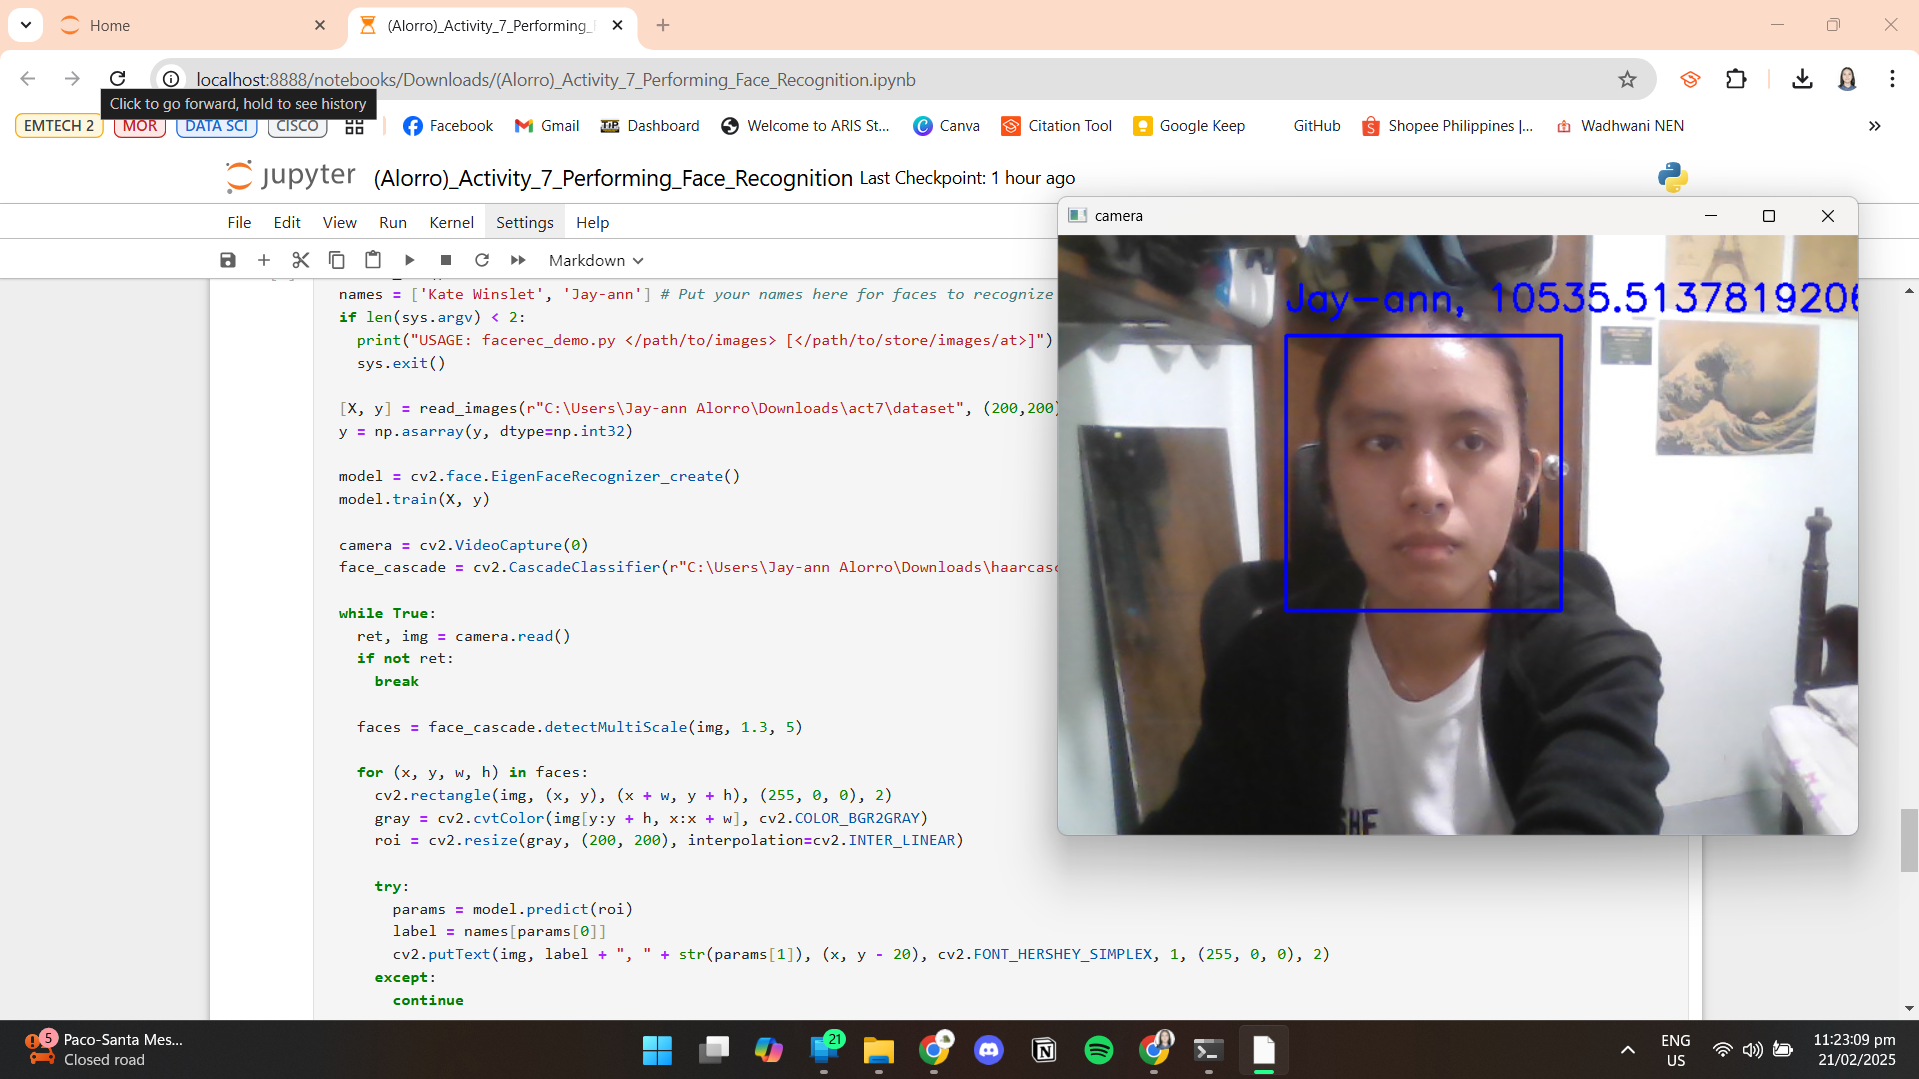

**Question: Provide an analysis of the sample script for the process using the Eigenface Model. What is the sample code doing? Are you able to troubleshoot any problems encountered?**

- In the sample script, it demonstrate a face recognition using Eigenface model. It loads a dataset of grayscale images and resizes them to a uniform size. It then trains an EigenFaceRecognition model on the images. The script then opens a webcam that detects faces in real-time and classify its identity.
- The troubleshooting that I did was to ensure that the images are read correctly, having the right version of OpenCV and adapting the command-line input code when running it in a Jupyter Notebook.

---
Perform the remaining face recognition techniques by using the same (or modified) process from the sample code:

- `model = cv2.face.createFisherFaceRecognizer()`
- `model = cv2.face.createLBPHFaceRecognizer()`

In [ ]:
def fisher_face_rec():
    names = ['Kate Winslet', 'Jay-ann']
    if len(sys.argv) < 2:
        print("USAGE: facerec_demo_fisher.py </path/to/images> [</path/to/store/images/at>]")
        sys.exit()

    [X, y] = read_images(r"C:\Users\Jay-ann Alorro\Downloads\act7\dataset", (200, 200))
    y = np.asarray(y, dtype=np.int32)

    model = cv2.face.FisherFaceRecognizer_create()
    model.train(X, y)

    camera = cv2.VideoCapture(0)
    face_cascade = cv2.CascadeClassifier(r"C:\Users\Jay-ann Alorro\Downloads\haarcascade_frontalface_default (1).xml")

    while True:
        ret, img = camera.read()
        if not ret:
            break

        faces = face_cascade.detectMultiScale(img, 1.3, 5)
        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
            gray = cv2.cvtColor(img[y:y + h, x:x + w], cv2.COLOR_BGR2GRAY)
            roi = cv2.resize(gray, (200, 200), interpolation=cv2.INTER_LINEAR)

            try:
                label_id, confidence = model.predict(roi)
                label = names[label_id]
                cv2.putText(img, f"{label}, {confidence:.2f}", (x, y - 20),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
            except Exception as e:
                print("Prediction error:", e)
                continue

        cv2.imshow("FisherFace Recognizer", img)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    camera.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    fisher_face_rec()

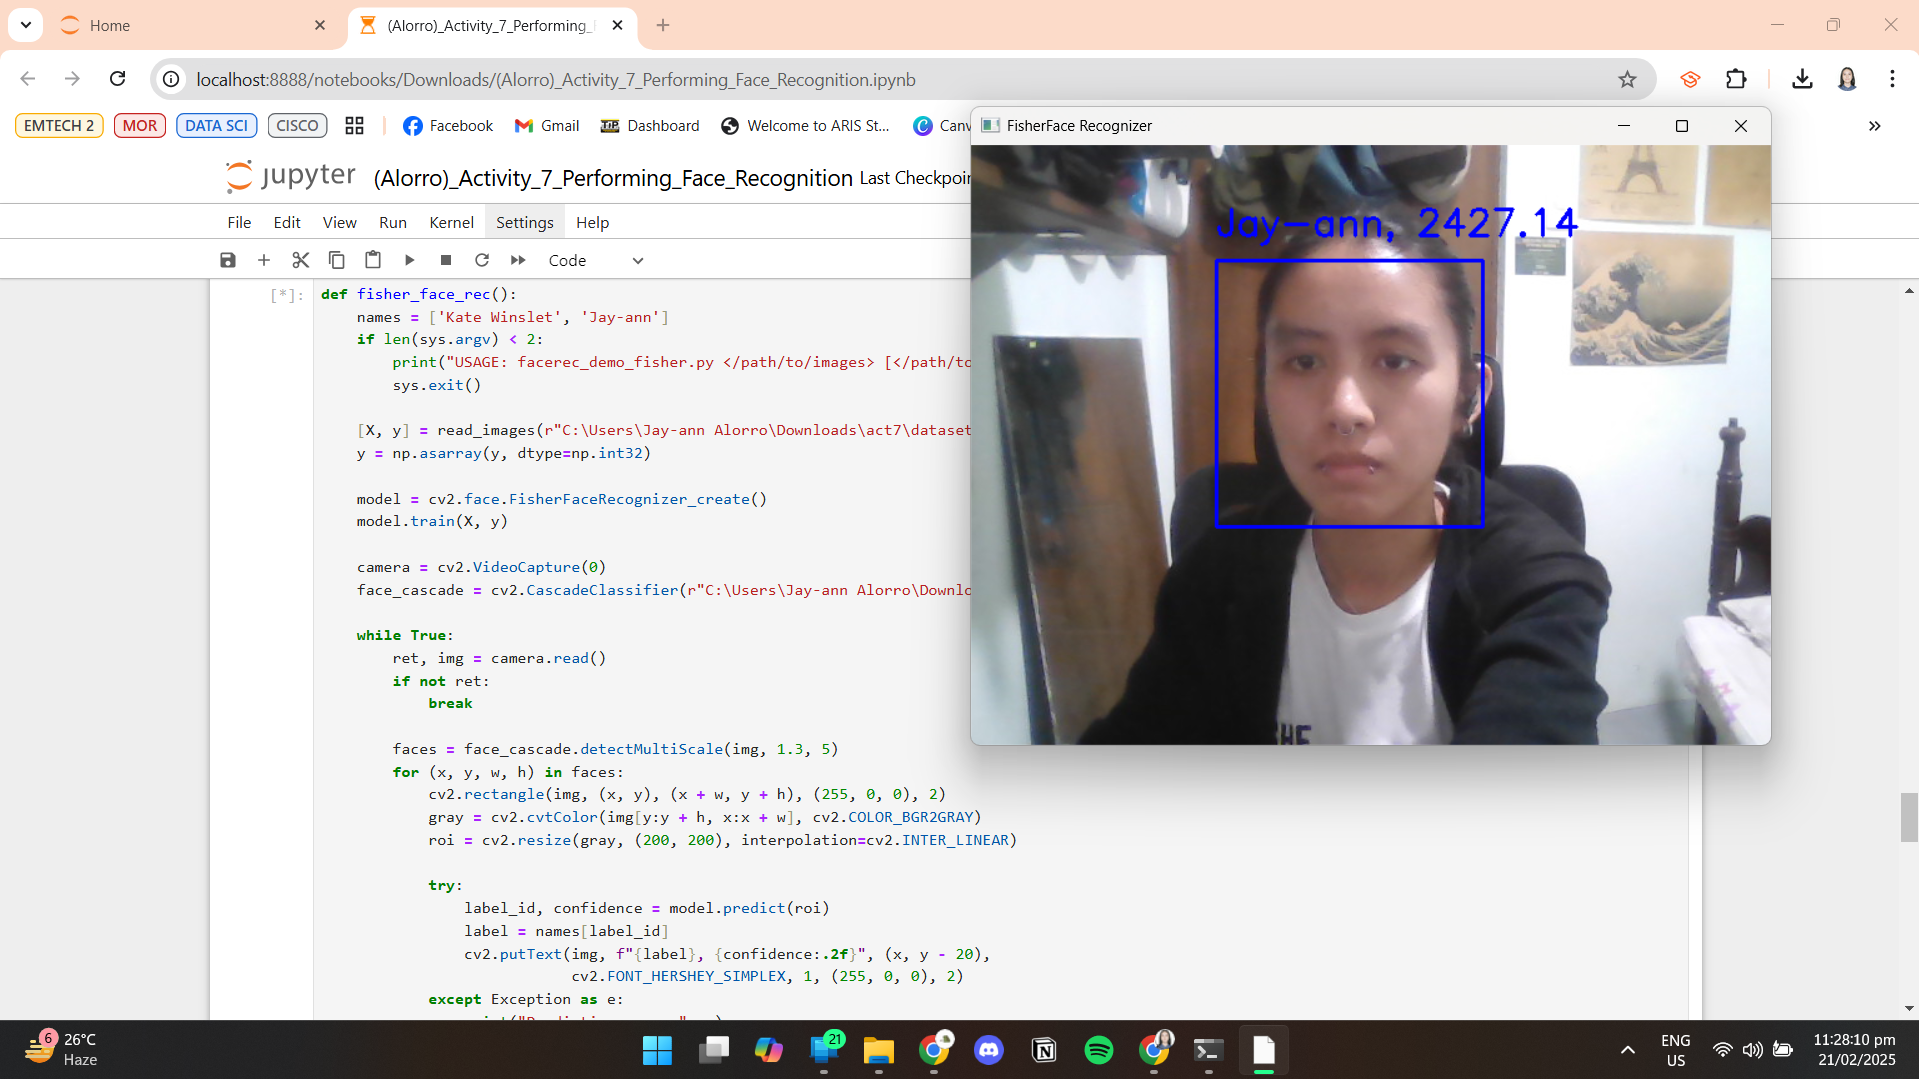

In [ ]:
import cv2
import sys
import numpy as np

def lbph_face_rec():
    names = ['Kate Winslet', 'Jay-ann']
    if len(sys.argv) < 2:
        print("USAGE: facerec_demo_lbph.py </path/to/images> [</path/to/store/images/at>]")
        sys.exit()

    [X, y] = read_images(r"C:\Users\Jay-ann Alorro\Downloads\act7\dataset", (200, 200))
    y = np.asarray(y, dtype=np.int32)

    model = cv2.face.LBPHFaceRecognizer_create()
    model.train(X, y)

    camera = cv2.VideoCapture(0)
    face_cascade = cv2.CascadeClassifier(r"C:\Users\Jay-ann Alorro\Downloads\haarcascade_frontalface_default (1).xml")

    while True:
        ret, img = camera.read()
        if not ret:
            break

        faces = face_cascade.detectMultiScale(img, 1.3, 5)
        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
            gray = cv2.cvtColor(img[y:y + h, x:x + w], cv2.COLOR_BGR2GRAY)
            roi = cv2.resize(gray, (200, 200), interpolation=cv2.INTER_LINEAR)

            try:
                label_id, confidence = model.predict(roi)
                label = names[label_id]
                cv2.putText(img, f"{label}, {confidence:.2f}", (x, y - 20),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
            except Exception as e:
                print("Prediction error:", e)
                continue

        cv2.imshow("LBPH Face Recognizer", img)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    camera.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    lbph_face_rec()

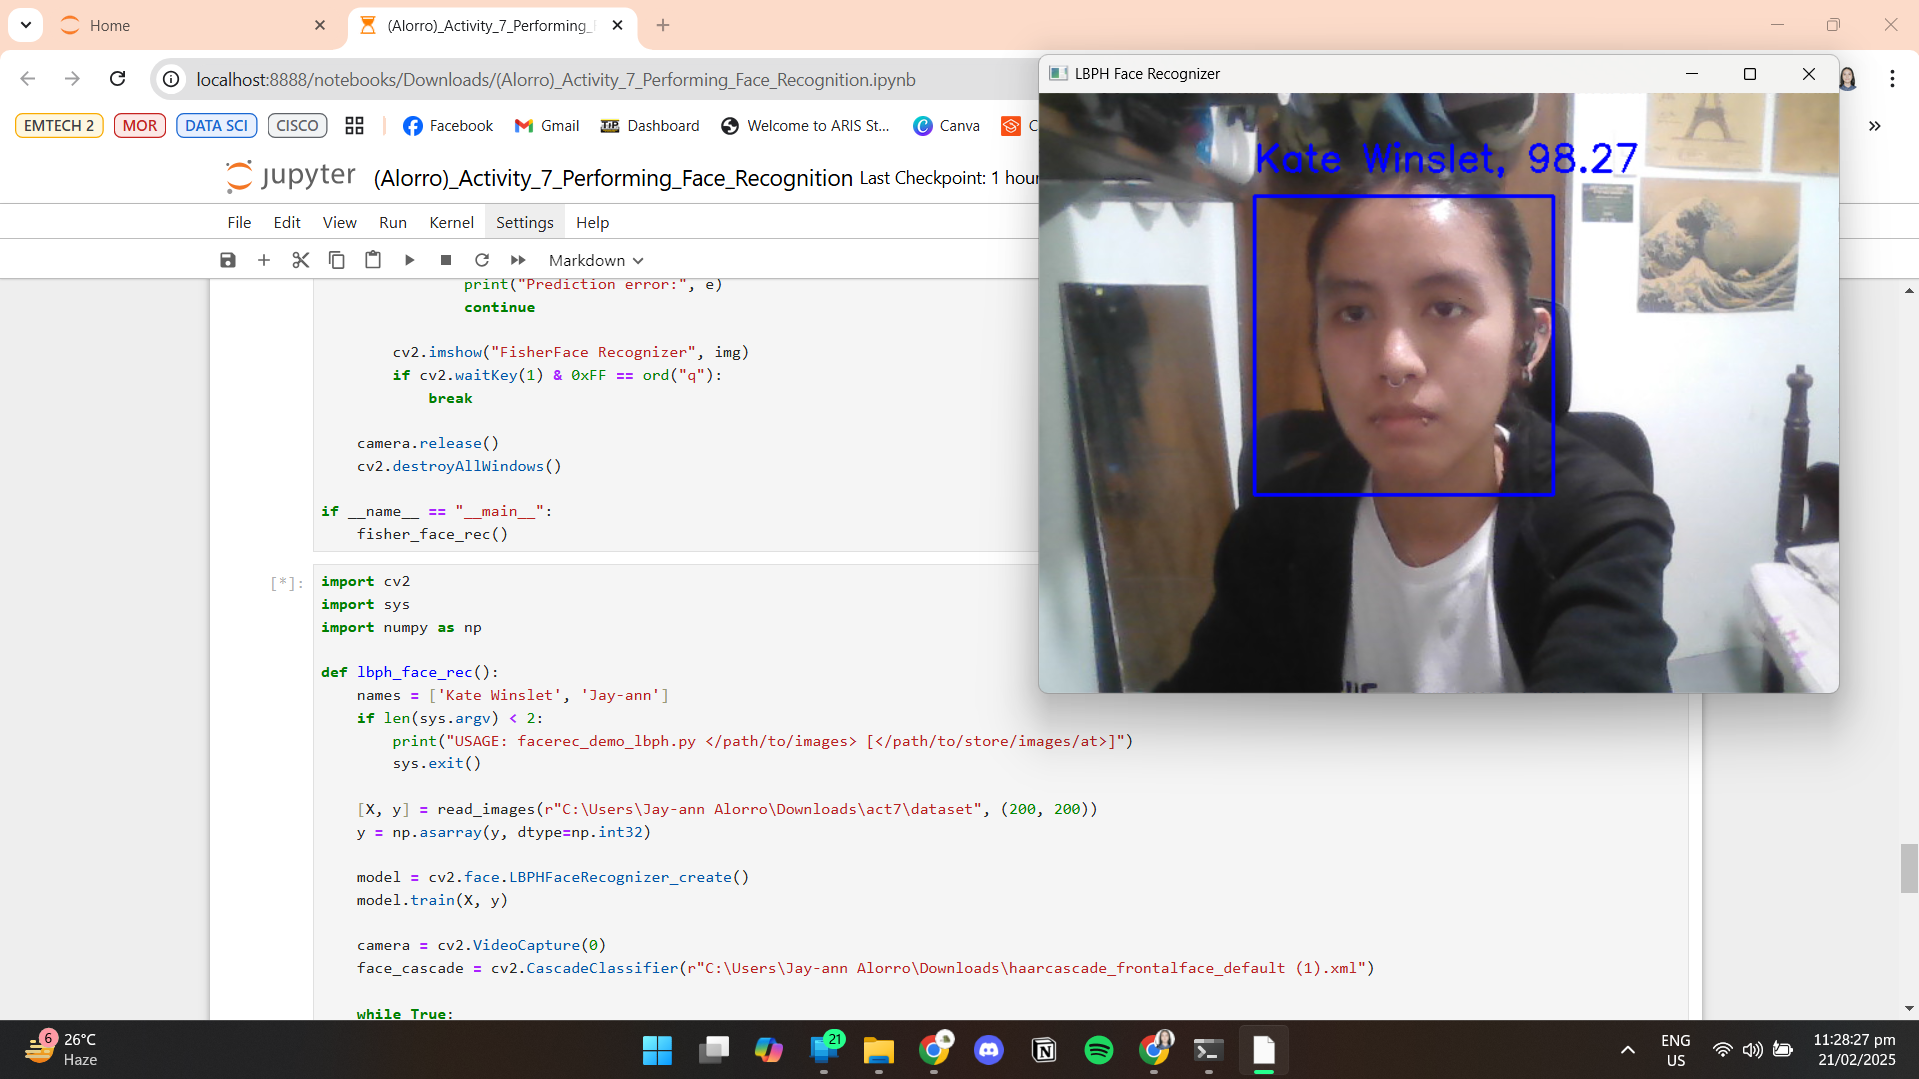

**Question: The `predict()` method returns a two-element array. Provide your analysis of the two returned values and their important ince this application.**

- The first element is the predicted label (an integer index mapping to a person's name), and the second is the confidence score. A lower confidence value means a closer match, indicating higher reliability of the recognition.

## 4. Supplementary Activity

Your accomplisment of the tasks below contribute to the achievement of ILO1, ILO2, and ILO3 for this module.

---

Tasks:
1. Create a new dataset for testing, this dataset must include the following:
  - The same person/s that the model has to recognize.
  - Different person/s that the model should not recognize.
2. For each model, perform 20 tests. Document the testing performed and provide observations.
3. Conclude on the performed tests by providing your evaluation of the performance of the models.

## 5. Summary, Conclusions and Lessons Learned

This activity focuses on face recognition which guided me through data preparation and implementing multiple face recognition algorithms. It involves training a model with a data of facial images and evaluating other different recognition techniques. I have realize that facial recognition is a crucial aspect of computer vision and it requires proper dataset preparation and algorithm selection.

In conclusion, I have learned that data preparation is essential for accurate face recognition. There are different algorithms and all of them can vary in performance. Facial recognition builds upon face detection but requires deeper feature analysis.

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*